In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [2]:
crop = pd.read_csv(r"Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
corr=crop.drop(['label'],axis=1).corr() 
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

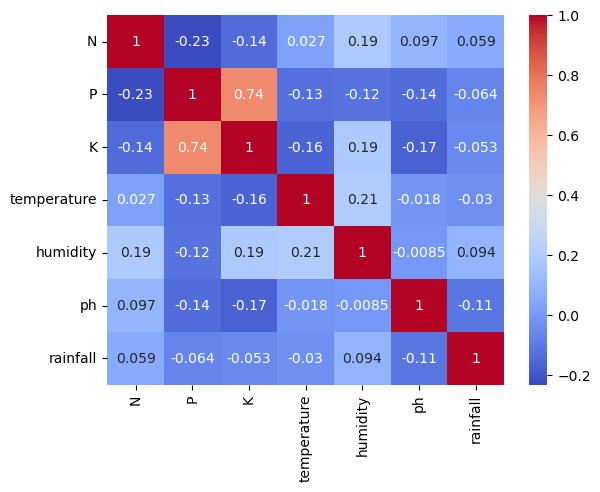

In [4]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

In [5]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## 1. Univariate Analysis

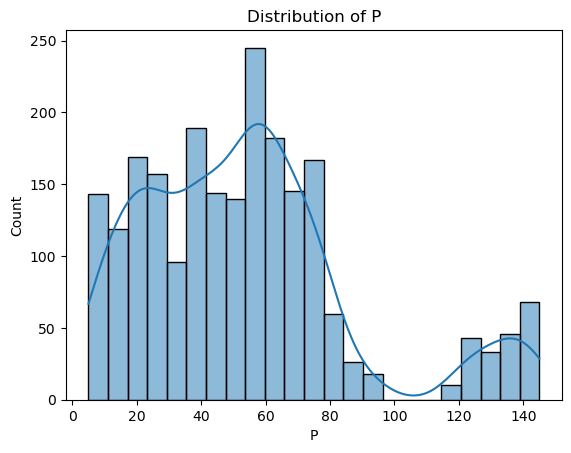

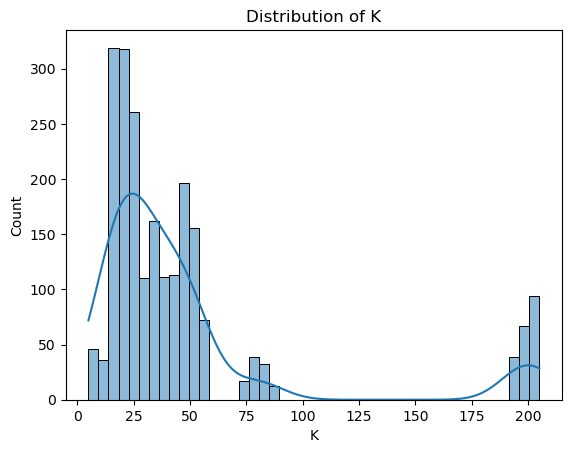

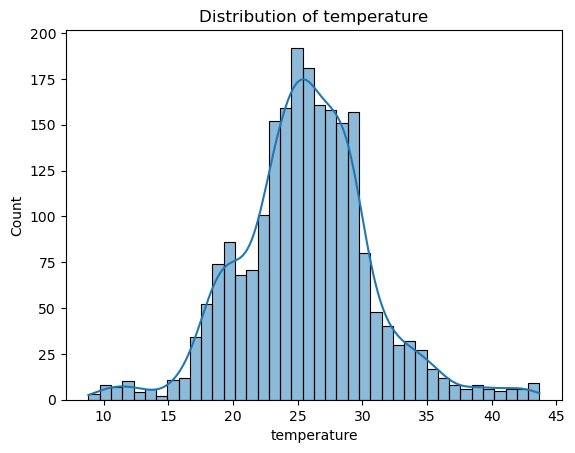

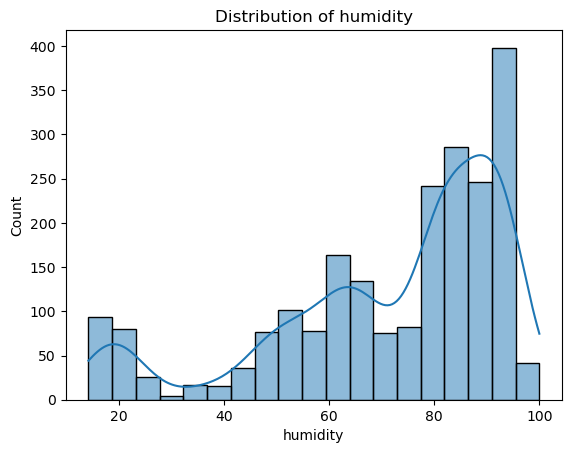

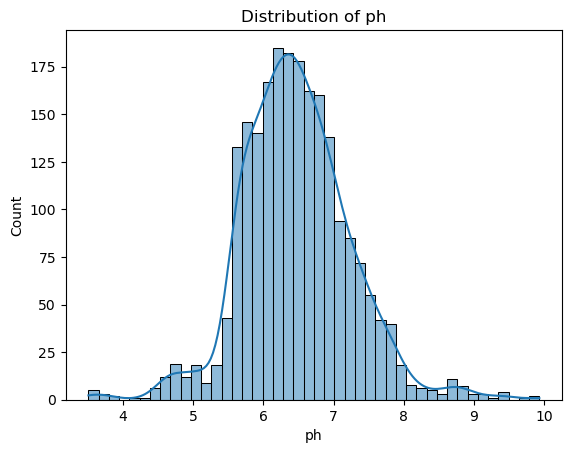

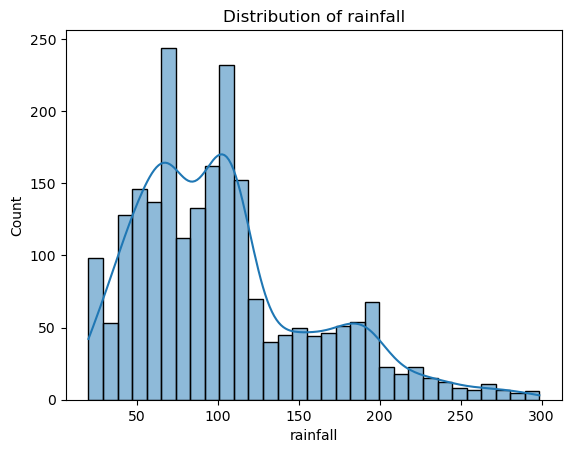

In [6]:
# Distribution of 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.histplot(crop[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

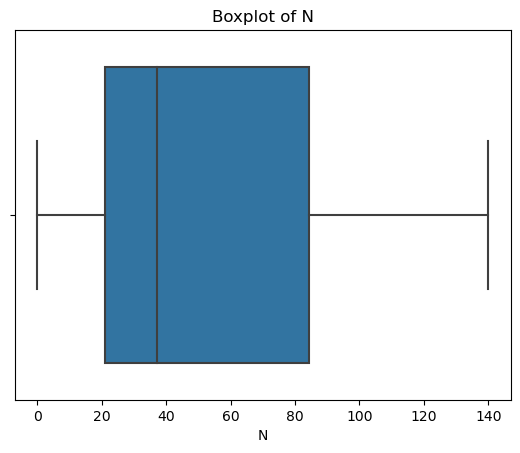

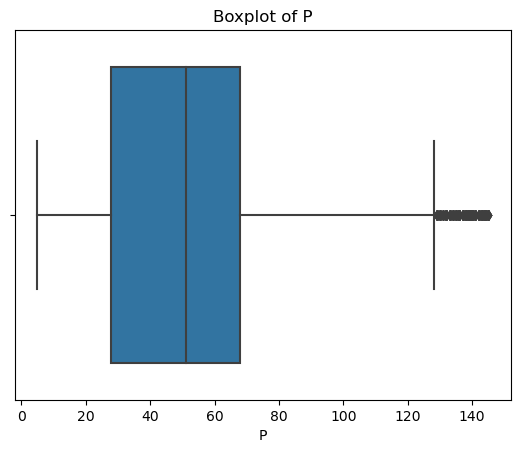

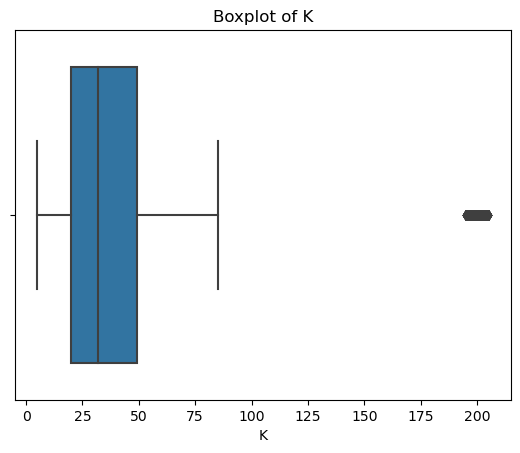

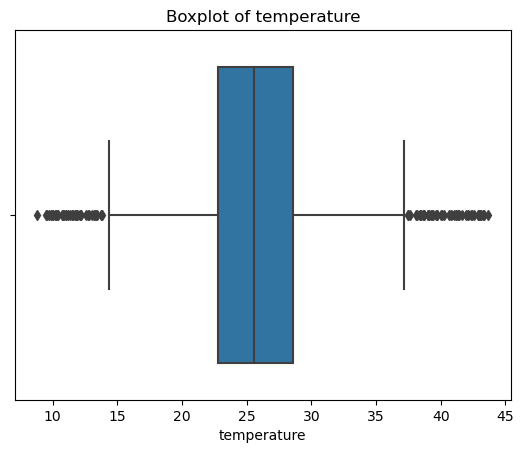

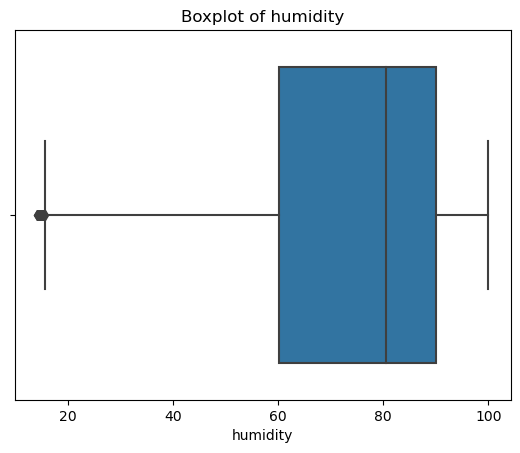

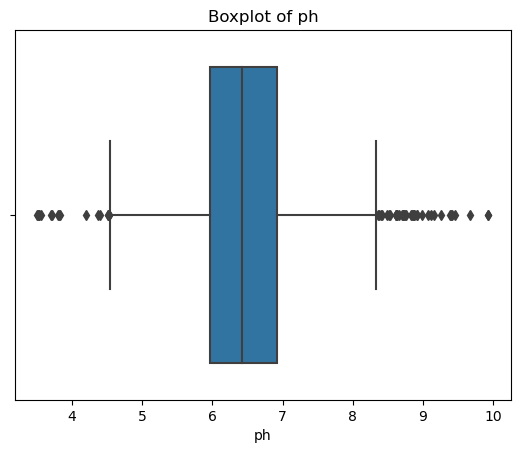

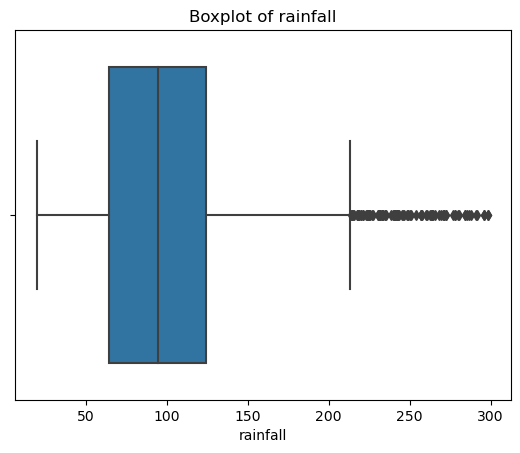

In [7]:
# Boxplot for 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.boxplot(x=crop[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

## 2. Bivariate Analysis

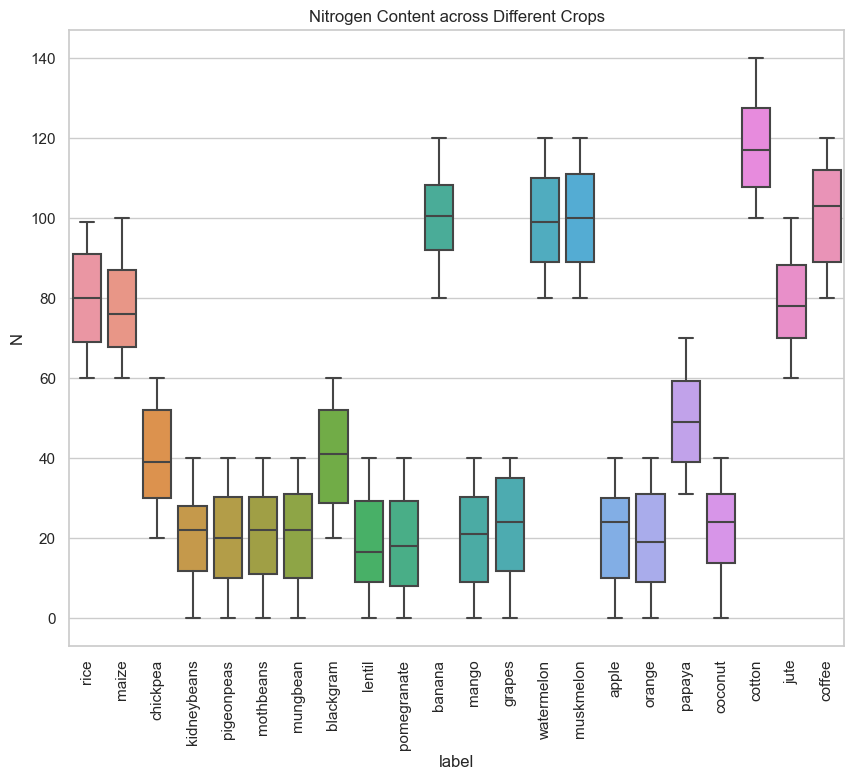

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting plot aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]


# Box Plots for a variable against crop types
sns.boxplot(x='label', y='N', data=crop)
plt.xticks(rotation=90)
plt.title('Nitrogen Content across Different Crops')
plt.show()


In [11]:
crop_dict = { 
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [12]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [13]:
crop=crop.drop('label',axis=1)

In [14]:
X=crop.drop('crop_num',axis=1) 
Y=crop['crop_num']

In [15]:
X.head() 

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [16]:
Y.head() 

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [17]:
X.shape

(2200, 7)

In [18]:
Y.shape

(2200,)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
X_train.shape

(1760, 7)

In [21]:
X_test.shape

(440, 7)

In [22]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()


ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [24]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [26]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9590909090909091
Decision Tree  with accuracy : 0.9886363636363636
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9818181818181818
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.8954545454545455


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, Y_train)

# Predict the labels of the test set
y_pred = nb_classifier.predict(X_test)


In [29]:
# Calculate evaluation metrics
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
accuracy = accuracy_score(Y_test, y_pred)

# Display evaluation metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.9958181818181817
Recall: 0.9954545454545455
F1-score: 0.9954229797979798
Accuracy: 0.9954545454545455


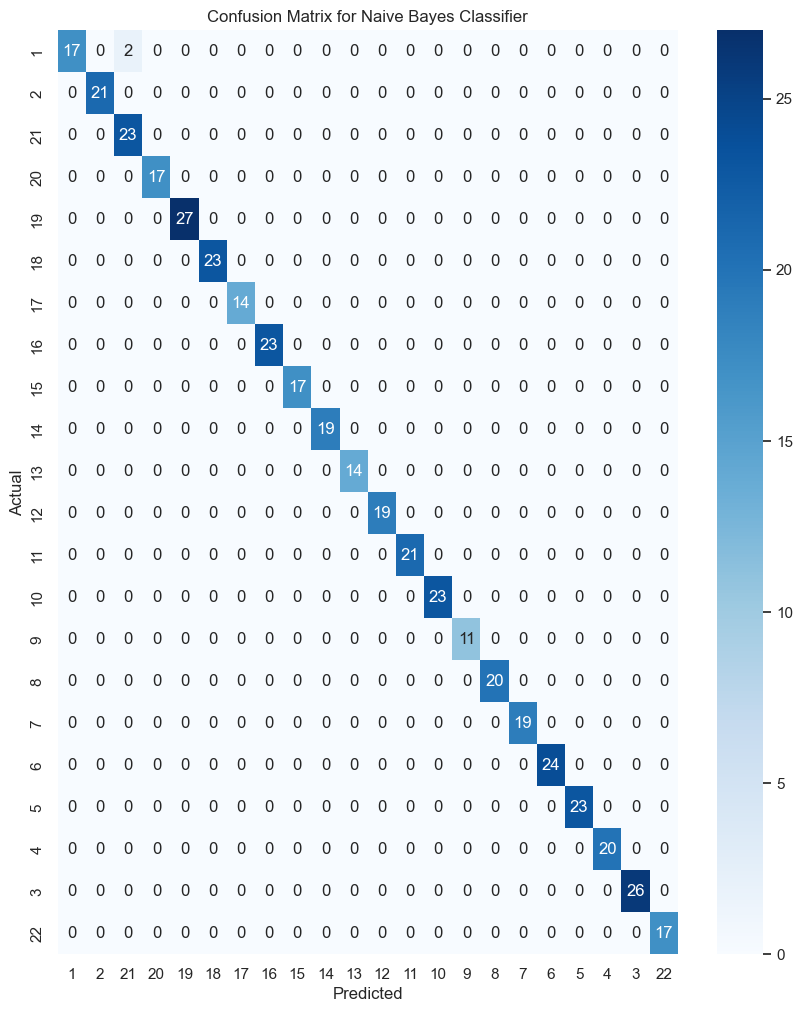

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=crop['crop_num'].unique(), 
            yticklabels=crop['crop_num'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


In [31]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load your data
crop_data = pd.read_csv('Crop_recommendation.csv')  

# Preprocessing
features = crop_data.drop('label', axis=1)
target = crop_data['label']

# Encoding the target variable
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(target)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Neural Network Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)

# Training the model
mlp.fit(X_train, Y_train)


C:\Users\naini\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
Y_pred = mlp.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9681818181818181
Precision: 0.9715087526852233
Recall: 0.9681818181818181
F1-score: 0.9687032498174405


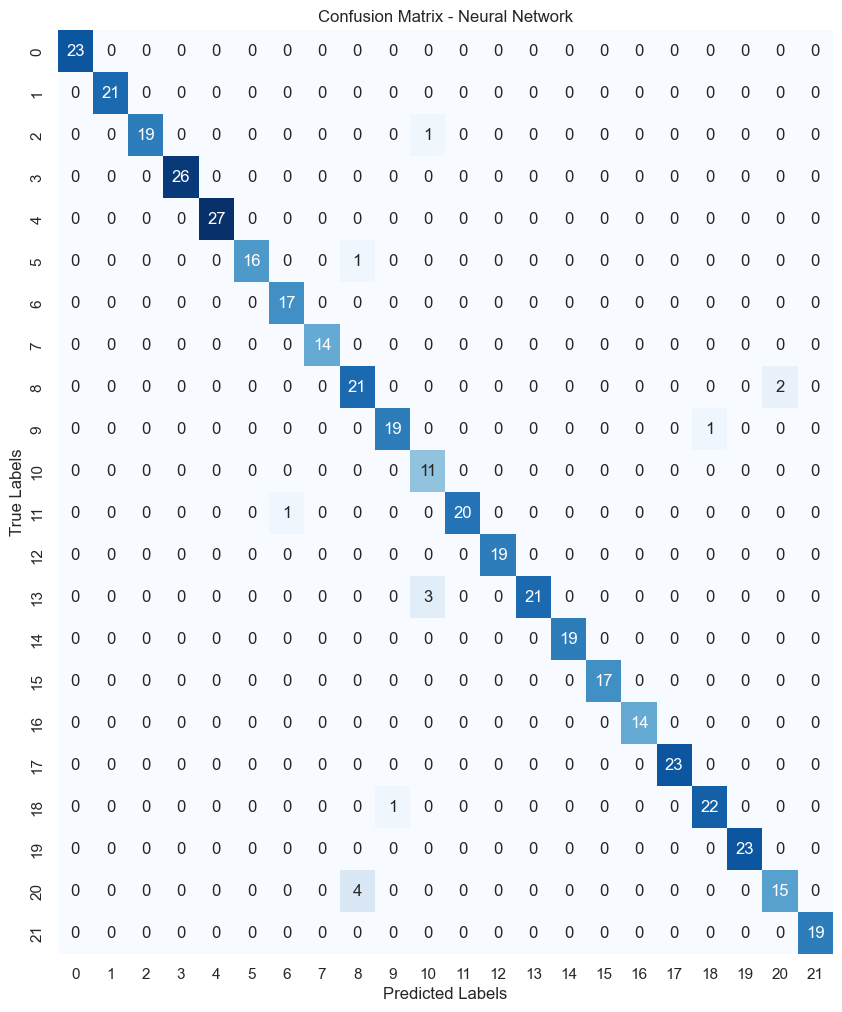

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Neural Network')
plt.show()


In [34]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

# Separate features and target variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.metrics import classification_report
import tracemalloc

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    tracemalloc.start()  # Start tracing the memory allocation
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Memory usage
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()  # Stop tracing the memory allocation
    
    # Predictions and probabilities on test set
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)
    
    # Log Loss
    model_log_loss = log_loss(y_test, y_probs)
    
    print(f"{model_name} training time: {training_time:.4f} seconds")
    print(f"{model_name} memory usage: {current / 10**6:.4f} MB; Peak: {peak / 10**6:.4f} MB")
    print(f"{model_name} Log Loss: {model_log_loss:.4f}\n")
    
    # Detailed classification report
    print(classification_report(y_test, y_pred))

# Train and evaluate Naive Bayes
nb_model = GaussianNB()
train_and_evaluate_model(nb_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Naive Bayes')

# Train and evaluate Neural Network
nn_model = MLPClassifier(random_state=42)
train_and_evaluate_model(nn_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Neural Network')


C:\Users\naini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



Naive Bayes training time: 0.0348 seconds
Naive Bayes memory usage: 0.0092 MB; Peak: 0.1701 MB
Naive Bayes Log Loss: 0.0165

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmel

C:\Users\naini\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



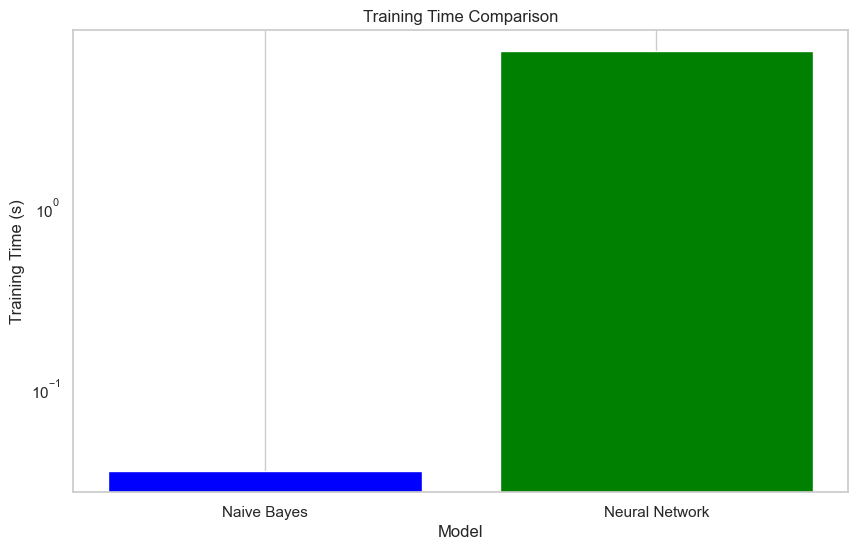

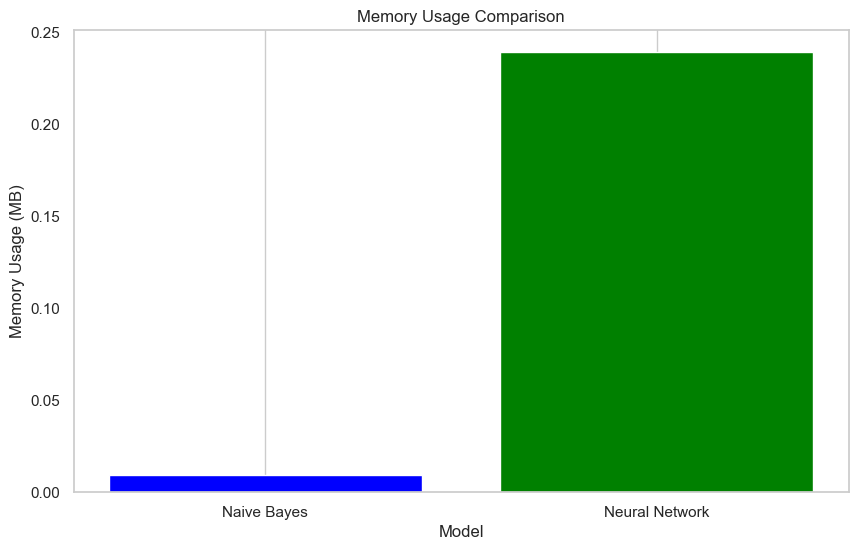

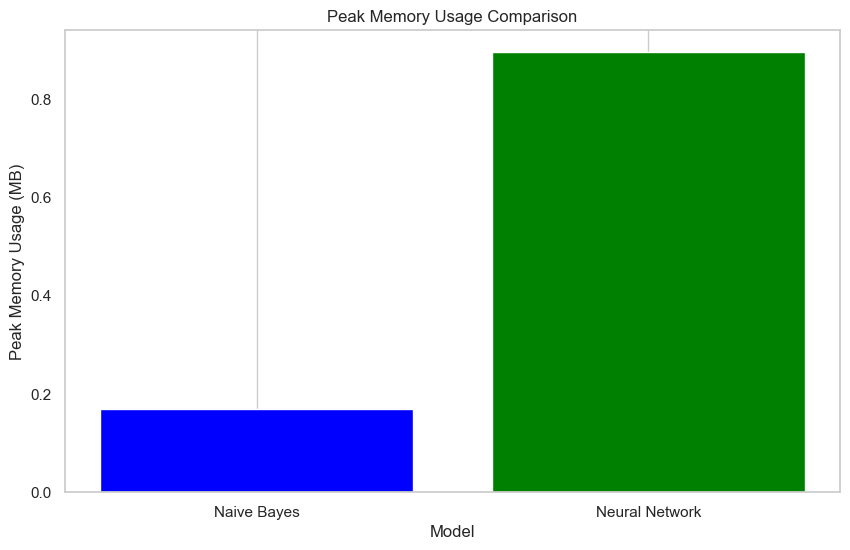

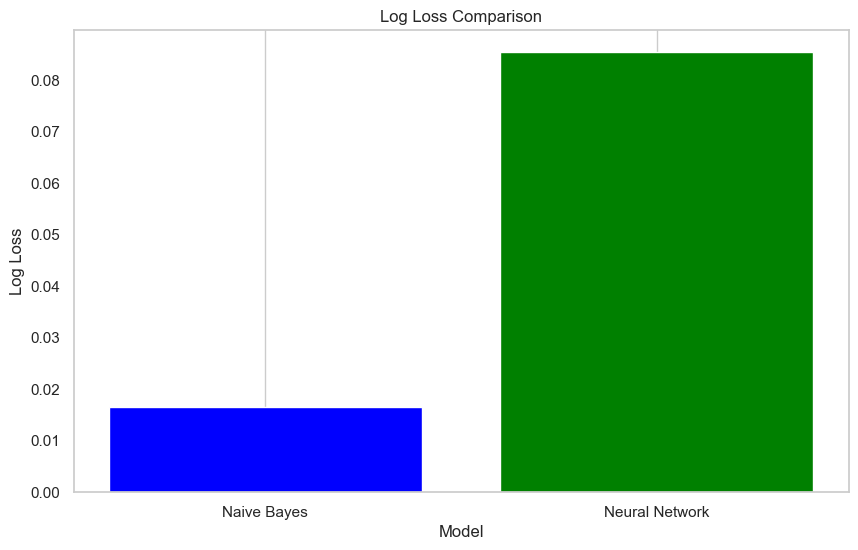

In [40]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'Model': ['Naive Bayes', 'Neural Network'],
    'Training Time (s)': [0.0348, 7.2994],
    'Memory Usage (MB)': [0.0092, 0.2391],
    'Peak Memory Usage (MB)': [0.1701, 0.8956],
    'Log Loss': [0.0165, 0.0854]
}

df = pd.DataFrame(data)

# Create a bar chart for training time
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Training Time (s)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.yscale('log')  # Logarithmic scale for y-axis
plt.grid(axis='y')
plt.show()

# Create a bar chart for memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for peak memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Peak Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Peak Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for log loss
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Log Loss'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')
plt.grid(axis='y')
plt.show()



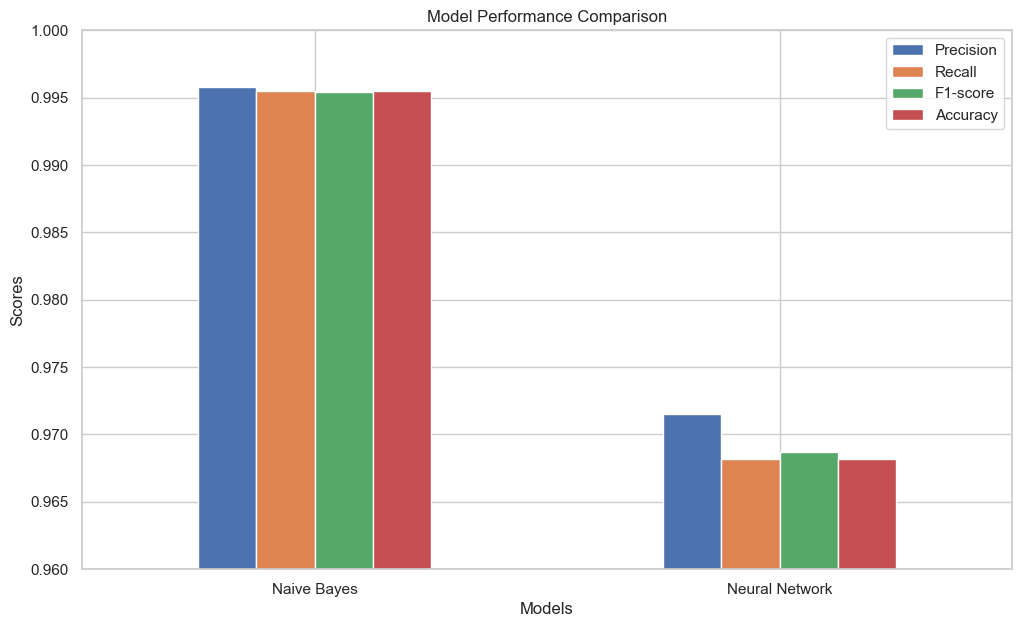

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ['Naive Bayes', 'Neural Network']
precision = [0.9958, 0.9715, ]
recall = [0.9955, 0.9682]
f1_score = [0.9954,0.9687]
accuracy = [0.9955, 0.9682]

# Creating DataFrame
df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-score': f1_score, 'Accuracy': accuracy}, index=models)

# Plotting
ax = df.plot(kind='bar', figsize=(12, 7))  
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
plt.xticks(rotation=0)
plt.grid(True)

# Adjusting y-axis scale to better visualize differences
ax.set_ylim(0.96, 1.0) 

plt.show()


In [ ]:
import pickle
pickle_out = open('naive_bayes_model.pkl', 'wb')
pickle.dump(nb_classifier,pickle_out)
pickle_out.close()